In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os

import advanced_lane_finding

%matplotlib inline

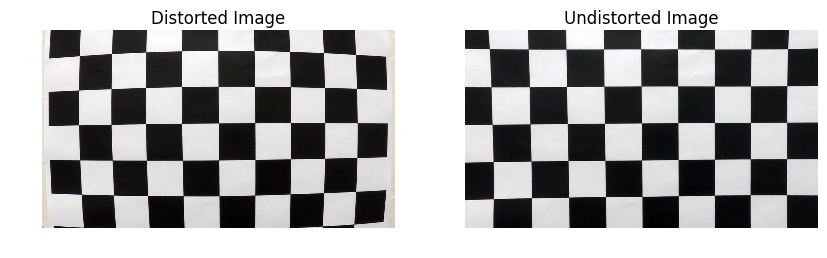

In [8]:
# Camera calibration 
calibration_images = glob.glob('../camera_cal/calibration*.jpg')
calibrator = advanced_lane_finding.CameraCalibrator(calibration_images,
                                                   9, 6,
                                                   use_existing_camera_coefficients = True)

# Take example distorted image and undistort it using saved camera coefficients
distorted_image = '../camera_cal/calibration1.jpg'
undistorted_image = calibrator.undistort(distorted_image)

# Display both distorted and undistorted images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Distorted Image')
plt.imshow(plt.imread(distorted_image))


plt.subplot(1, 2, 2)
plt.imshow(undistorted_image)
plt.axis('off')
plt.title('Undistorted Image')

plt.show()

In [45]:
# Distortion correction looks OK, 
# now I’m going to save all undistorted images to 
# ./output_images/undistorted folder

UNDISTORTED_DEST_LOCATION = '../output_images/camera_cal/'

calibration_images = glob.glob('../camera_cal/calibration*.jpg')

for image in calibration_images:
    start = image.rindex('/') + 1
    end = image.rindex('.')
    dest_path = UNDISTORTED_DEST_LOCATION + image[start:end] + '.jpg'
    undistorted_image = calibrator.undistort(image)
    # Save undistorted image
    cv2.imwrite(dest_path, undistorted_image)

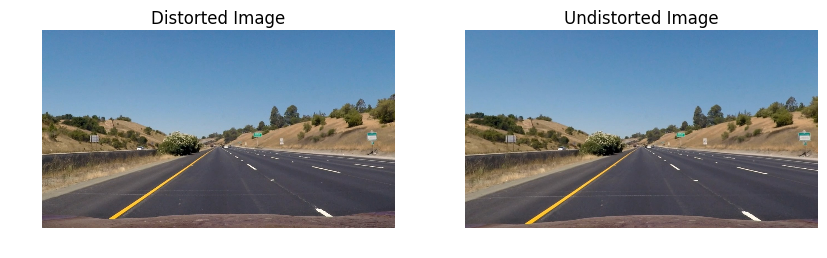

In [52]:
# Next, we are going to apply distortion correction to testing images

sample_image = '../test_images/straight_lines1.jpg'
straight = calibrator.undistort(sample_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(plt.imread(sample_image))
plt.title('Distorted Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(straight, cv2.COLOR_BGR2RGB))
plt.title('Undistorted Image')
plt.axis('off')

plt.show()

In [54]:
# Next we are going to save distrotion corrected images to 
# ./output_images/test_images_ undistorted folder

TEST_IMAGES_LOCATION = '../test_images/'
images_loc = os.listdir(TEST_IMAGES_LOCATION)

for image_loc in images_loc:
    corred_image_file = TEST_IMAGES_LOCATION + image_loc
    distorted_image_location = '../test_images/' + image_loc
    corrected_image = calibrator.undistort(distorted_image_location)
    cv2.imwrite(corred_image_file, corrected_image)